In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_LFW_X_df, get_y_df, data_prep
from model_arch import build_model
from hyperparameters import create_callback, EPOCHS, LEARNING_RATE, BATCH_SIZE
from predictions import generate_predictions, generate_csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

2023-10-02 00:07:57.879105: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 00:07:57.923453: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 00:07:57.924258: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-10-02 00:07:58.922848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from model_arch.ipynb
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.12.0
Tensorflow version: 2.12.0
importing Jupyter notebook from predictions.ipynb


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
data_filepath = "../data/csv/plant_data.csv"
checkpoint_filepath = "../model_weights/regression/simple_LFW"

In [4]:
callback = create_callback(
    checkpoint_filepath
)

In [5]:
df = pd.read_csv(data_filepath)
df['LFW_g'].mean()

61.29107942973524

In [6]:
X = get_LFW_X_df(data_filepath)
y = get_y_df(data_filepath, "LFW_g")
#X.tail()
X_train, X_test, y_train, y_test = data_prep(X, y)

In [7]:
model = build_model()
print('Input shape:', X_train[0].shape)

Input shape: ()


2023-10-02 00:08:00.873206: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-02 00:08:00.892319: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.2,
    callbacks = [callback]
)

Epoch 1/350
11/11 [==============================] - 0s 12ms/step - loss: 6522.4575 - val_loss: 6556.9795
Epoch 2/350
11/11 [==============================] - 0s 3ms/step - loss: 6520.8589 - val_loss: 6555.4829
Epoch 3/350
11/11 [==============================] - 0s 2ms/step - loss: 6519.2964 - val_loss: 6553.9829
Epoch 4/350
11/11 [==============================] - 0s 2ms/step - loss: 6517.7109 - val_loss: 6552.5020
Epoch 5/350
11/11 [==============================] - 0s 3ms/step - loss: 6516.1685 - val_loss: 6551.0142
Epoch 6/350
11/11 [==============================] - 0s 3ms/step - loss: 6514.5986 - val_loss: 6549.5513
Epoch 7/350
11/11 [==============================] - 0s 2ms/step - loss: 6513.0591 - val_loss: 6548.0928
Epoch 8/350
11/11 [==============================] - 0s 5ms/step - loss: 6511.5410 - val_loss: 6546.6333
Epoch 9/350
11/11 [==============================] - 0s 3ms/step - loss: 6510.0220 - val_loss: 6545.1812
Epoch 10/350
11/11 [==============================] - 

11/11 [==============================] - 0s 3ms/step - loss: 6502.5327 - val_loss: 6538.0605
Epoch 15/350
11/11 [==============================] - 0s 2ms/step - loss: 6501.0376 - val_loss: 6536.6655
Epoch 16/350
11/11 [==============================] - 0s 2ms/step - loss: 6499.5737 - val_loss: 6535.2720
Epoch 17/350
11/11 [==============================] - 0s 3ms/step - loss: 6498.1157 - val_loss: 6533.8784
Epoch 18/350
11/11 [==============================] - 0s 3ms/step - loss: 6496.6528 - val_loss: 6532.4956
Epoch 19/350
11/11 [==============================] - 0s 3ms/step - loss: 6495.2173 - val_loss: 6531.1060
Epoch 20/350
11/11 [==============================] - 0s 4ms/step - loss: 6493.7739 - val_loss: 6529.7231
Epoch 21/350
11/11 [==============================] - 0s 4ms/step - loss: 6492.3208 - val_loss: 6528.3633
Epoch 22/350
11/11 [==============================] - 0s 2ms/step - loss: 6490.9146 - val_loss: 6526.9854
Epoch 23/350
11/11 [==============================] - 0s 5m

In [10]:
model.save(checkpoint_filepath)

INFO:tensorflow:Assets written to: ../model_weights/regression/simple_LFW/assets


INFO:tensorflow:Assets written to: ../model_weights/regression/simple_LFW/assets


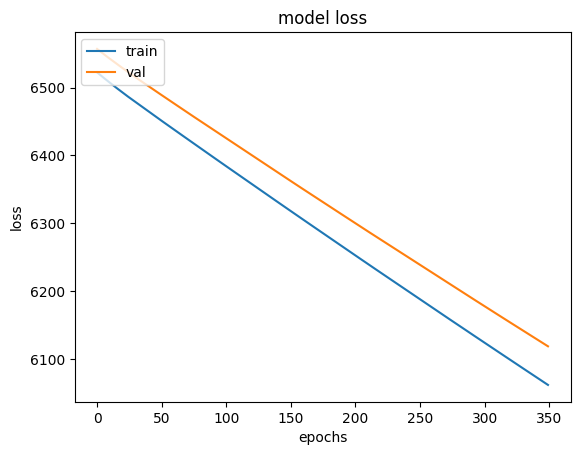

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 5497.2612


5497.26123046875

In [13]:
figures_filepath = "../figures/simple_LFW_error_csv"
generate_csv(model, X_test, y_test, "LFW_predictions", "LFW_actual", figures_filepath)

2/2 [==============================] - 0s 3ms/step
